In [1]:
#Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='nltk')
warnings.filterwarnings('ignore', category=UserWarning, module='vader_lexicon')

In [2]:
#DataFrame
df = pd.read_csv("C:/Users/xxxXXXxxx/Desktop/data_sets/singapore_airlines_reviews.csv")

In [3]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               10000 non-null  object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [4]:
#Drop N/A
df.dropna(inplace = True)

In [5]:
#Clean published_date, use UTC to take into account different timezones
df['published_date'] = pd.to_datetime(df['published_date'], utc=True)

In [6]:
#Overall Ratings (Percentage)
#Number of 1-5 Reviews
rating_amount = df['rating'].value_counts()
rating_count = rating_amount.sort_index(inplace=False, ascending=False)

#ratings = Percentage of 1-5 Reviews
rating = df['rating'].value_counts(normalize=True)*100
ratings = rating.sort_index(inplace=False, ascending=False)

print(rating_count)
print(ratings)

5    5424
4    1967
3    1009
2     543
1    1057
Name: rating, dtype: int64
5    54.24
4    19.67
3    10.09
2     5.43
1    10.57
Name: rating, dtype: float64


In [7]:
#Overall Platform Preference
platform = df['published_platform'].value_counts()
print(platform)

Desktop    7352
Mobile     2648
Name: published_platform, dtype: int64


In [8]:
#Import NLTK (Natural Language ToolKit) VADER (Valence Aware Dictionary for Sentiment Reasoning) lexicon 
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Travis
[nltk_data]     Wolf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
#Use NLTK VADER to discover what reviews are positive, negative, and neutral
reviews = df['text']

#Calculate compound scores for each review
compound_scores = [sia.polarity_scores(review)["compound"] for review in reviews]

#Average Sentiment Score
average_score = sum(compound_scores) / len(compound_scores)
print(f"Average Compound Score: {average_score:.2f}")

#Sentiment Aggregation
positive_reviews = sum(score > 0.1 for score in compound_scores)
negative_reviews = sum(score < -0.1 for score in compound_scores)
neutral_reviews = len(compound_scores) - positive_reviews - negative_reviews
print(f"Positive Reviews: {positive_reviews}")
print(f"Negative Reviews: {negative_reviews}")
print(f"Neutral Reviews: {neutral_reviews}")

Average Compound Score: 0.56
Positive Reviews: 8083
Negative Reviews: 1712
Neutral Reviews: 205


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '5'),
  Text(1, 0, '4'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1')])

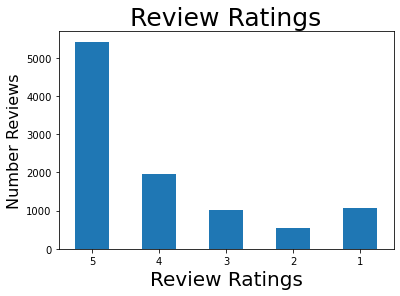

In [10]:
#Bar Graph for 1-5 Ratings
rating_count.plot(kind='bar')
plt.ylabel('Number Reviews', fontsize=16)
plt.xlabel('Review Ratings', fontsize=20)
plt.title('Review Ratings', fontsize=25)
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Desktop'), Text(1, 0, 'Mobile')])

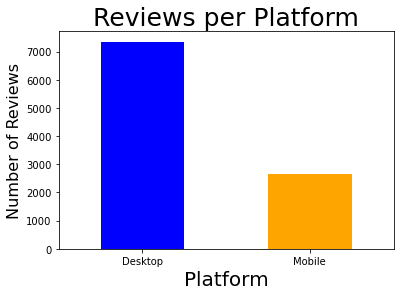

In [11]:
#Bar Graph of Platform Use
platform.plot(kind='bar', color=['blue', 'orange'])
plt.ylabel('Number of Reviews', fontsize=16)
plt.xlabel('Platform', fontsize=20)
plt.title('Reviews per Platform', fontsize=25)
plt.xticks(rotation=0)

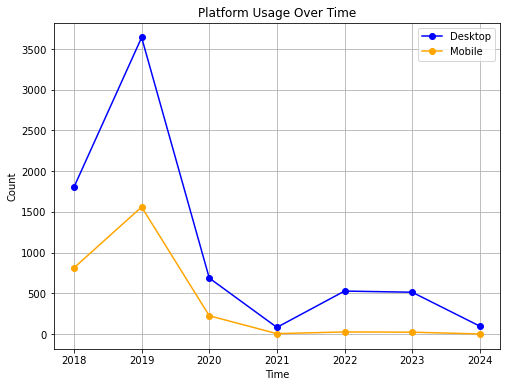

In [12]:
#Multiple Line Graph Tracking Platform Preference Over Time
df.set_index(df['published_date'], inplace=True)
platform_usage = df.groupby(df['published_date'].dt.year)['published_platform'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
plt.plot(platform_usage.index, platform_usage['Desktop'], marker='o', label='Desktop', color='blue')
plt.plot(platform_usage.index, platform_usage['Mobile'], marker='o', label='Mobile', color='orange')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Platform Usage Over Time')
plt.grid(True)
plt.legend()

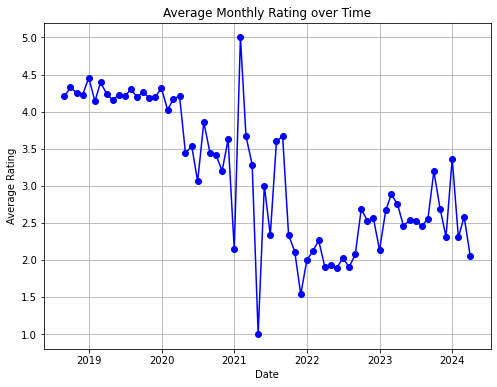

In [13]:
#Line Graph Showing the Average Monthly Rating Over Time
df.set_index(df['published_date'], inplace=True)
ratings_over_time = df['rating'].resample('M').mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(ratings_over_time['published_date'],ratings_over_time['rating'], marker='o', color='b')
plt.title('Average Monthly Rating over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)

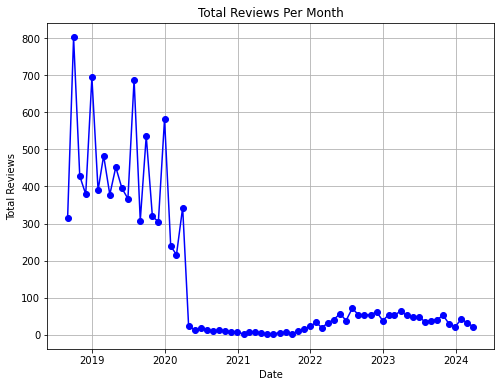

In [14]:
#Line Graph Showing the Total Reviews per Month
df.set_index(df['published_date'], inplace=True)
total_reviews = df['rating'].resample('M').count().reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(total_reviews['published_date'], total_reviews['rating'], marker='o', color='b')
plt.title('Total Reviews Per Month')
plt.xlabel('Date')
plt.ylabel('Total Reviews')
plt.grid(True)

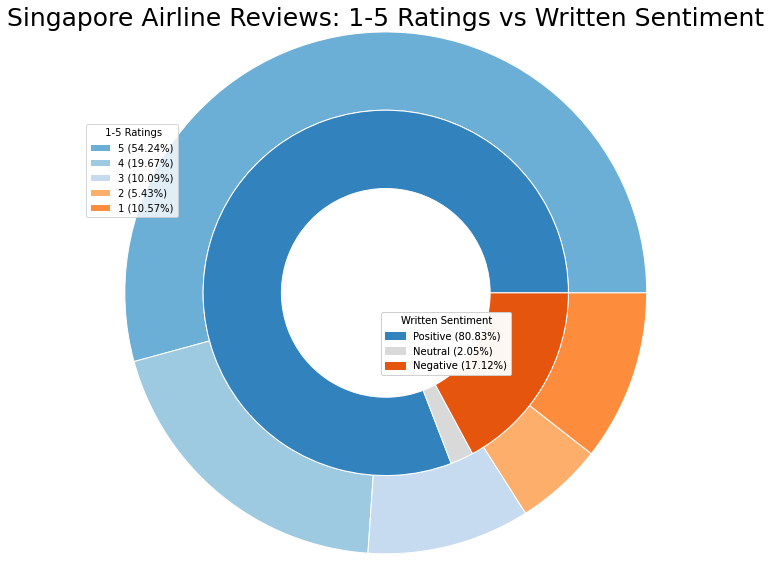

In [15]:
#Nested Pie Chart Showing the Number of 1-5 Ratings vs the Total Sentiment of Written Reviews

#Data
outer_vals = np.array(ratings)  # Outer circle values
inner_vals = np.array([positive_reviews, neutral_reviews, negative_reviews])  # Inner circle values

# Compute percentages
total_outer = sum(outer_vals)
total_inner = sum(inner_vals)
outer_percentages = [f"{val/total_outer*100:.2f}%" for val in outer_vals]
inner_percentages = [f"{val/total_inner*100:.2f}%" for val in inner_vals]

#Colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap([1, 2, 3, 6, 5])
inner_colors = cmap([0, 19, 4])

#Legend
labels1 = ['Positive', 'Neutral', 'Negative']
labels2 = ['5', '4', '3', '2', '1']

# Create the Pie Chart
fig, ax = plt.subplots()
size = 0.9
plt.title("Singapore Airline Reviews: 1-5 Ratings vs Written Sentiment", loc='Center', y=1.7, fontsize=25)

# Outer Circle
ax.pie(outer_vals, radius=3, colors=outer_colors, wedgeprops=dict(width=size, edgecolor="w"),
       labels=labels2, labeldistance=None)

# Inner Circle
ax.pie(inner_vals, radius=3 - size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor="w"),
       labels=labels1, labeldistance=None)

# Outer Legend
outer_legend=plt.legend(title=" 1-5 Ratings", labels=[f"{l} ({p})"
        for l, p in zip(labels2, outer_percentages)], loc="upper left", bbox_to_anchor=(-0.9, 1.3))

#Inner Legend
legend_handles = [Patch(color=c, label=label)
        for c, label in zip(inner_colors, labels1)]
inner_legend = plt.legend(handles=legend_handles, title="Written Sentiment",labels=[f"{l} ({p})"
        for l, p in zip(labels1, inner_percentages)], loc="lower right",bbox_to_anchor=(1.1, 0.1))

ax.add_artist(outer_legend)
ax.add_artist(inner_legend)

plt.show()

In [16]:
#Create csv files of rating_count, ratings, platform, platform_usage,
#total_reviews, and rating_over_time for making a tableau dashboard
singrate=pd.DataFrame(index=rating_count.index, data=rating_count.values)
singrate.to_csv('C:/Users/xxxXXXxxx/Desktop/data_sets/Singapore_rating_count.csv')

singratings=pd.DataFrame(index=ratings.index, data=ratings.values)
singratings.to_csv('C:/Users/xxxXXXxxx/Desktop/data_sets/Singapore_ratings.csv')

singplatform=pd.DataFrame(index=platform.index, data=platform.values)
singplatform.to_csv('C:/Users/xxxXXXxxx/Desktop/data_sets/Singapore_platform.csv')

singusage=pd.DataFrame(index=platform_usage.index, data=platform_usage.values)
singusage.to_csv('C:/Users/xxxXXXxxx/Desktop/data_sets/SingPlatform_usage.csv')

singratetime=pd.DataFrame(index=ratings_over_time.index, data=ratings_over_time.values)
singratetime.to_csv('C:/Users/xxxXXXxxx/Desktop/data_sets/SingRate_over_time.csv')

singtotalrev=pd.DataFrame(index=total_reviews.index, data=total_reviews.values)
singtotalrev.to_csv('C:/Users/xxxXXXxxx/Desktop/data_sets/SingTotal_reviews.csv')

In [17]:
#Create csv files for the NLTK VADER data to use in making a tableau dashboard
singsentiment=pd.DataFrame(index=["Positive Reviews", "Neutral Reviews", "Negative Reviews"], data=[positive_reviews, neutral_reviews, negative_reviews])
singsentiment.to_csv('C:/Users/xxxXXXxxx/Desktop/data_sets/Singapore_sentiment.csv')